In [41]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

# Téléchargement du fichier CIF

In [42]:
with MPRester("cG5llIAs5Ub9zbbJaG") as m:
    #le code ci-dessous télécharge la cellule primitive du materiau
    #pour télécharger la cellule CONVENTIONNELLE standard il faut modifier le paramètre << conventional_unit_cell = True >>
    structure = m.get_structure_by_material_id("mp-961713", conventional_unit_cell = False)
    

    w = CifWriter(structure)
    w.write_file("ZrSnPt_mp-961713.cif")
    
    print("Cliquez sur le lien pour télécharger le fichier .CIF du materiau ZrSnPt")
    
    display(FileLink("mp-961713.cif"))

Cliquez sur le lien pour télécharger le fichier .CIF du materiau ZrSnPt


/home/users/c/m/cmoureau/mp-961713.cif

# 1. Bande interdite

La bande interdite est indirect.
L'énergie de la bande est: 0.9643000000000006
La bande interdite se situe entre 0 eV (points vert) et 0.9643000000000006 eV (points rouge).
Vecteur de transition : \Gamma-X


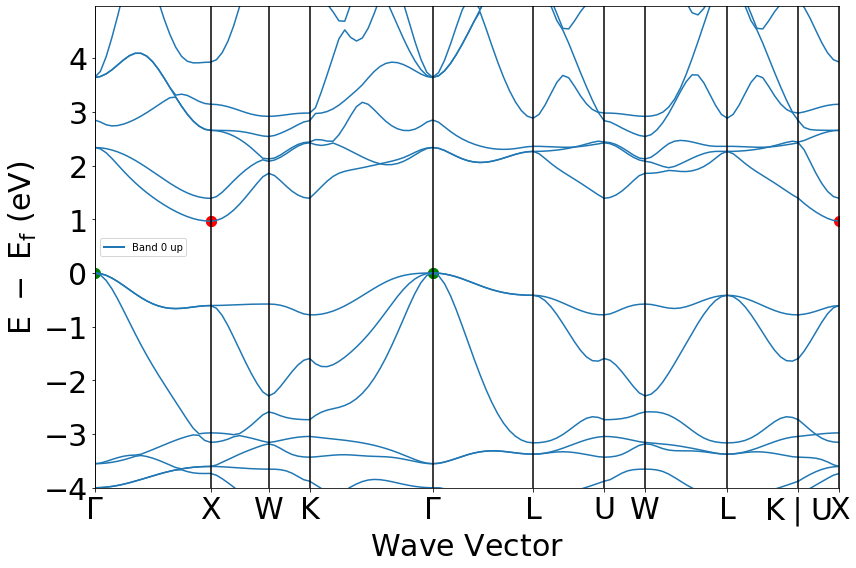

In [43]:
bandstructure = m.get_bandstructure_by_material_id("mp-961713")
bsplotter = BSPlotter(bandstructure)
gap = bandstructure.get_band_gap()
bsplotter.get_plot(vbm_cbm_marker = True)

if gap.get('direct') == False:
    print('La bande interdite est indirect.')
else:
    print('La bande interdite est direct.')

print("L'énergie de la bande est:", gap.get('energy'))
print('La bande interdite se situe entre 0 eV (points vert) et {} eV (points rouge).'.format(gap.get('energy')))
print("Vecteur de transition :", gap['transition'])

La bande interdite se situe entre la bande de valence et la bande de conduction. Elle correspond à une bande de valeurs énergétiques dont les niveaux ne peuvent pas être occupés par les électrons du cristal.

La bande interdite est délimitée sur le graphique par les points verts et rouges situés respectivement en 0eV et 0.96ev. La largeur de bande interdite est donc relativement petite (0.96eV < 1eV). Les électrons pourront facilement passer cette bande interdite pour rejoindre la bande de conduction. Le materiau ZrSnPt est donc un conducteur.

Grace au graphique, on confirme qu'il s'agit effectivement d'un materiau conducteur car les extremums des bandes de valence et des bandes de conduction (respectivement les points verts et rouges) ne correspondent pas au même quasi moment.

# 2. Dispersion 

La dispersion décrit la relation entre l'énergie des électrons et leur vecteur d'onde à travers la bande d'énergie. La dispersion décrit la forme de ces bandes d'énergie, qui peuvent être plus ou moins courbes ou plates en fonction des interactions entre les électrons et les atomes du matériau.

Une forte dispersion signifie que les électrons ont une grande variation d'énergie pour des moments différents, tandis qu'une faible dispersion signifie que l'énergie des électrons varie peu avec leur moment.

Nous allons donc déterminer les pentes maximales et minimales de chaque branche pour ces bandes. Une pente minimale correspondra à un minimum de dispersion et inversément.

In [44]:
def pente(delta, y):
    resultat = abs(y[-1] - y[0])/(delta)
    return resultat

### Dernière bande de valence et première bande de conduction

Les indices des bandes de VALENCE maximales sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16, 17]})
Les indices des bandes de CONDUCTION minimales sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})

Bande de valence
La dispersion maximale dans la bande de valence correspond à une pente, en valeur abssolue, de  0.7514881780606139 et est représenté par la flèche rouge
La dispersion minimale dans la bande de valence correspond à une pente, en valeur abssolue, de  0.058058193569933456 et est représenté par la flèche bleue

Bande de conduction
La dispersion maximale dans la bande de conduction correspond à une pente, en valeur abssolue, de  1.821269177868119 et est représenté par la flèche verte
La dispersion minimale dans la bande de conduction correspond à une pente, en valeur abssolue, de  0.08627836938260487 et est représenté par la flèche jaune



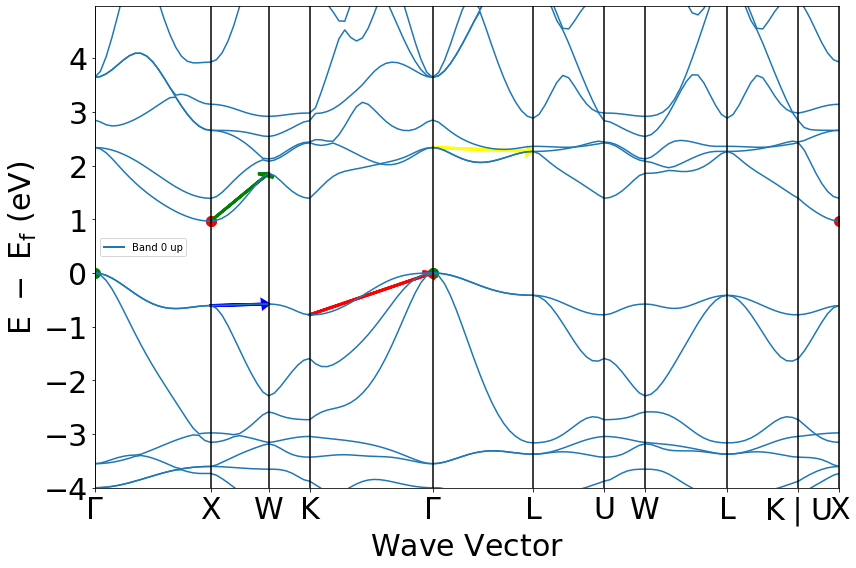

In [57]:
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot(vbm_cbm_marker = True)
energie = data.get('energy').get('1')
distance = data.get('ticks').get('distance')


vbm = bandstructure.get_vbm() #bandes de VALENCE maximales
print("Les indices des bandes de VALENCE maximales sont :" , vbm['band_index']) 
#vbm = [15, 16, 17] on prend le plus grand indice

cbm = bandstructure.get_cbm() #bande de CONDUCTION minimales
print("Les indices des bandes de CONDUCTION minimales sont :" , cbm['band_index']) 
#cbm = [18]

valence_index = 17
conduction_index = 18

pente_valence = np.zeros(10)
pente_conduction = np.zeros(10)
x = np.unique(distance)
dx = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    pente_valence[i] = pente(dx[i], energie[i][valence_index])
    pente_conduction[i] = pente(dx[i], energie[i][conduction_index])

     
## Bande de VALENCE
max_valence = np.max(pente_valence) #situé à l'indice 3
min_valence = np.min(pente_valence) #situé à l'indice 1
print("\nBande de valence")
print("La dispersion maximale dans la bande de valence correspond à une pente, en valeur abssolue, de ", max_valence ,"et est représenté par la flèche rouge")
print("La dispersion minimale dans la bande de valence correspond à une pente, en valeur abssolue, de ", min_valence ,"et est représenté par la flèche bleue")
print("")


## Bande de CONDUCTION
max_conduction = np.max(pente_conduction) #situé à l'indice 1
min_conduction = np.min(pente_conduction) #situé à l'indice 4
print("Bande de conduction")
print("La dispersion maximale dans la bande de conduction correspond à une pente, en valeur abssolue, de ", max_conduction,"et est représenté par la flèche verte")
print("La dispersion minimale dans la bande de conduction correspond à une pente, en valeur abssolue, de ", min_conduction,"et est représenté par la flèche jaune")
print("")


plt.arrow(x[3], energie[3][valence_index][0], dx[3], energie[3][valence_index][-1] - energie[3][valence_index][0], head_width=0.15, head_length=0.05, linewidth=3, color='red', length_includes_head=True)
plt.arrow(x[1], energie[1][valence_index][0], dx[1], energie[1][valence_index][-1] - energie[1][valence_index][0], head_width=0.15, head_length=0.05, linewidth=3, color='blue', length_includes_head=True)
plt.arrow(x[1], energie[1][conduction_index][0], dx[1], energie[1][conduction_index][-1] - energie[1][conduction_index][0], head_width=0.15, head_length=0.05, linewidth=3, color='green', length_includes_head=True)
plt.arrow(x[4], energie[4][conduction_index][0], dx[4], energie[4][conduction_index][-1] - energie[4][conduction_index][0], head_width=0.15, head_length=0.05, linewidth=3, color='yellow', length_includes_head=True)

plt.show()

### Analyse dispersion dans la dernière bande de valence 

La plus grande dispersion associée à la dernière bande de valence vaut en valeur absolue 0.75, elle est représentée par une flèche rouge sur la graphique et à lieu sur K-Γ.

La plus petite dispersion associée à la dernière bande de valence vaut en valeur absolue 0.058, elle est représentée par une flèche bleue sur la graphique et à lieu sur X-W.

### Analyse dispersion dans la première bande de conduction 

La plus grande dispersion associée à la première bande de conduction vaut en valeur absolue 1.82, elle est représentée par une flèche verte sur la graphique et à lieu sur X-W.

La plus petite dispersion associée à la première bande de conduction vaut en valeur absolue 0.086, elle est représentée par une flèche jaune sur la graphique et à lieu sur Γ-L.

# 3. Masse effective

En toute généralité, la masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l’énergie E par rapport au
vecteur d’onde k: $$m^{*}_{ij} = \frac{∂E^{2}}{∂k_{i}∂k_{j}}$$

En supposant une dispersion parabolique on a $$m^* = \frac{\hbar^2 k^2}{2\cdot E(k)} = \frac{\hbar^2 (k_x^2 + k_y^2 + k_z^2)}{2\cdot E(k)}$$
où E(k) est l'énergie d'un électron de vecteur d'onde k dans la bande considérée et $\hbar$ est la constante de Plank.

In [61]:
h_bar = 6.5821e-16

## Bande de valence

In [62]:
kpoint_vbm = vbm['kpoint'].cart_coords
energie_vbm = vbm['energy']

masse_vbm = (h_bar**2 * (kpoint_vbm[0]**2 + kpoint_vbm[1]**2 + kpoint_vbm[2]**2)) / (2*abs(energie_vbm))
print("La masse effective au sommet de la dernière bande de valence = " + str(masse_vbm) + " kg")

La masse effective au sommet de la dernière bande de valence = 0.0 kg


## Bande de conduction

In [63]:
kpoint_cbm = cbm['kpoint'].cart_coords
energie_cbm = cbm['energy']

masse_cbm = (h_bar**2 * (kpoint_cbm[0]**2 + kpoint_cbm[1]**2 + kpoint_cbm[2]**2)) / (2*abs(energie_cbm))
print("La masse effective au sommet de la dernière bande de valence = " + str(masse_cbm) + " kg")

La masse effective au sommet de la dernière bande de valence = 2.8804261675510907e-32 kg
